In [35]:
import numpy as np
import scipy as sci
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import mido
import pypianoroll
from notes import ChordPattern
from effects import lp_4th_order
from synth import ADSR

from notes import Event

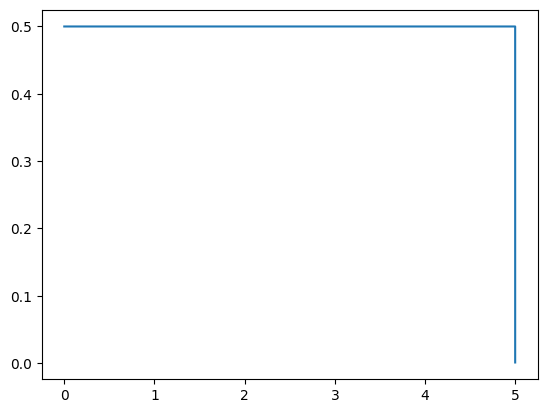

In [82]:
def ADSR(x, a, d, s, r, k = -3, show_plot = False):
    '''Function to generate an ADSR enveloppe on data x'''
    if True: #x[-1] >= (a + d + r): In the future could possibly make this quicker by checking if signal is shorter then a,d,r
        val = 1-np.exp(-k)
        attack = lambda x: (1-np.exp(-k*x/a))/val
        decay = lambda x: 1 - (1-s)*(np.exp(k*(x-a)/d)-1)/(np.exp(k)-1)
        sustain = lambda x: s
        pre_rel_x = np.append(0, x[x < (x[-1] - r)])    # Appending a 0 in the begining in case the duration is 0
        pre_rel = np.piecewise(
            pre_rel_x, 
            [pre_rel_x < a, np.logical_and(a <= pre_rel_x, pre_rel_x < a+d), a+d<=pre_rel_x],
            [attack, decay, sustain]
        )

        #print(pre_rel_x)
        
        #release = (x[-1]*pre_rel[-1]/r - pre_rel[-1]/r*x[x[-1] - r <= x])[1:]
        release = (pre_rel[-1]*(1 - (np.exp(k*(x[x[-1] - r <= x]-x[-1]+r)/(r+0.000001))-1)/(np.exp(k)-1)))[1:]
        

        if show_plot == True:
            plt.plot(np.concatenate((pre_rel, release)))
            plt.show()

        return np.concatenate((pre_rel, release))
    
adsr = ADSR(t, 0, 0, 0.5, 0.0001)
plt.plot(t, adsr)

In [77]:
sr = 44100
time = 5
t = np.linspace(0, time, time*sr)
sig = sci.signal.sawtooth(2*np.pi*t*200)
#sig = np.sin(t*40*2*np.pi)

adsr = ADSR(t, 0, 0.5, 0.5, 1)

sig = lp_4th_order(sig, 10+adsr*4000, 3, sr)#*ADSR(t, 0, 1.2, 0, 1)

data = np.iinfo(np.int16).max * sig / np.max(np.abs(sig))
write("audio_tests/soundlab_output.wav", sr, data.astype(np.int16))

In [14]:
data = np.iinfo(np.int16).max * dat / np.max(np.abs(dat))
write("audio_tests/soundlab_output.wav", sr, data.astype(np.int16))

In [2]:
a = ChordPattern(
    np.mod(np.array([0, 10, 5]) + np.random.randint(11), 12),
    np.array([0, 0, 0]),
    np.array([2, 2, 4])
)

[]
[[ 9  1  4]
 [ 7 11  2]
 [ 2  6  9]]


In [3]:
a.scale

array([ 1,  2,  4,  6,  7,  9, 11])

In [207]:
notes = []
bpm = 77
beat_time = 60/bpm


for i in range(2):
    notes.append(Event(30+i, i*beat_time, (i+1)*beat_time, 0))

In [3]:
a = np.array([1, 2, 3, 4])
b = np.array([1, 2, 5, 6])

np.unique(np.concatenate(np.array([a, b])))

array([1, 2, 3, 4, 5, 6])

In [200]:
class MidiMessage:
    '''Class for note events. Contains info about pitch, start and length of the notes.'''
    def __init__(self, action, note, time, velocity, channel):
        self.action = action
        self.note = note
        self.time = time
        self.velocity = velocity
        self.channel = channel
    
    def __str__(self) -> str:
        string = "\nEvent: "+ str(self.action)
        string += "\n\t MIDI Note: " + str(self.note)
        string += "\n\t Velocity: " + str(self.velocity)
        string += "\n\t Time: " + str(self.time)
        string += "\n\t Channel: " + str(self.channel)
        return string

In [201]:
mid = mido.MidiFile()
track = mido.MidiTrack()
mid.tracks.append(track)

tempo = mido.bpm2tempo(bpm)

# Meta info
track.append(mido.MetaMessage('instrument_name', name="test"))
track.append(mido.MetaMessage('set_tempo', tempo = mido.bpm2tempo(bpm)))

In [202]:
midi_events = []

for i in notes:
    midi_events.append(MidiMessage(
        "note_on", 
        i.midi_note, 
        i.start, 
        127,
        i.channel
    ))

    midi_events.append(MidiMessage(
        "note_off",
        i.midi_note,
        i.end,
        127,
        i.channel
    ))

# Sort events
midi_events.sort(key = lambda x: x.time)       # Sort by time

ctime = 0

for ev in midi_events:
    delta = ev.time - ctime
    ctime = ev.time
    track.append(mido.Message(
        ev.action, 
        note=ev.note, 
        velocity=ev.velocity, 
        time=round(mido.second2tick(delta, mid.ticks_per_beat, tempo)), 
        channel = ev.channel
        )
    )

mid.save('test.mid')

In [11]:
mid = mido.MidiFile("temp/track_3.mid")
for i, track in enumerate(mid.tracks):
    print('Track {}: {}'.format(i, track.name))
    for msg in track:
        print(msg)

Track 0: 
MetaMessage('instrument_name', name='drum', time=0)
MetaMessage('set_tempo', tempo=1416137, time=0)
note_on channel=0 note=0 velocity=127 time=0
note_on channel=1 note=20 velocity=127 time=0
note_on channel=0 note=10 velocity=127 time=240
note_off channel=0 note=0 velocity=127 time=240
note_off channel=1 note=20 velocity=127 time=0
note_on channel=0 note=11 velocity=127 time=0
note_on channel=1 note=20 velocity=127 time=0
note_on channel=0 note=30 velocity=127 time=0
note_off channel=0 note=10 velocity=127 time=240
note_on channel=0 note=10 velocity=127 time=0
note_off channel=0 note=11 velocity=127 time=240
note_off channel=1 note=20 velocity=127 time=0
note_off channel=0 note=30 velocity=127 time=0
note_on channel=0 note=10 velocity=127 time=0
note_on channel=0 note=11 velocity=127 time=0
note_on channel=0 note=12 velocity=127 time=0
note_on channel=0 note=30 velocity=127 time=0
note_off channel=0 note=10 velocity=127 time=240
note_on channel=0 note=12 velocity=127 time=0
n

In [203]:
round(mido.second2tick(delta, mid.ticks_per_beat, tempo))

480

In [204]:
for i in track:
    print(i)

MetaMessage('instrument_name', name='test', time=0)
MetaMessage('set_tempo', tempo=779221, time=0)
note_on channel=0 note=30 velocity=127 time=0
note_off channel=0 note=30 velocity=127 time=480
note_on channel=0 note=31 velocity=127 time=0
note_off channel=0 note=31 velocity=127 time=480


Multitrack(name=None, resolution=24, tempo=array(shape=(888, 1), dtype=float64), tracks=[StandardTrack(name='', program=0, is_drum=False, pianoroll=array(shape=(888, 128), dtype=uint8)), StandardTrack(name='', program=0, is_drum=False, pianoroll=array(shape=(888, 128), dtype=uint8)), StandardTrack(name='', program=0, is_drum=False, pianoroll=array(shape=(888, 128), dtype=uint8)), StandardTrack(name='', program=0, is_drum=False, pianoroll=array(shape=(888, 128), dtype=uint8))])


[<Axes: xlabel='time (beat)', ylabel='off\n\npitch'>,
 <Axes: xlabel='time (beat)', ylabel='off\n\npitch'>,
 <Axes: xlabel='time (beat)', ylabel='off\n\npitch'>,
 <Axes: xlabel='time (beat)', ylabel='off\n\npitch'>]

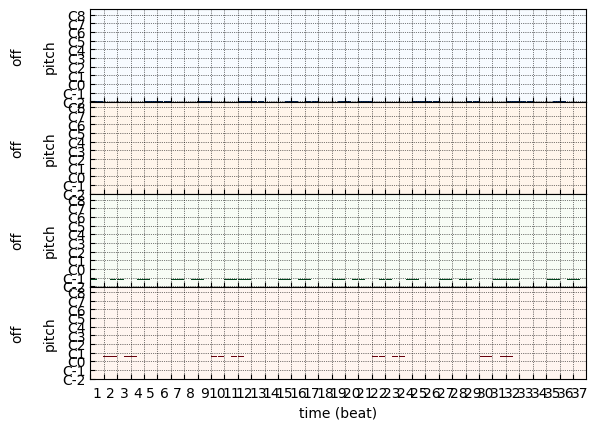

In [14]:
multitrack = pypianoroll.read("temp/track_3.mid")
print(multitrack)
multitrack.plot(track_label = "off")